## NumtaDB dataset Kaggle
### https://www.kaggle.com/BengaliAI/numta
### https://arxiv.org/abs/1806.02452

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

### This image classifier is trained on a subset of the NumtaDB dataset available on Kaggle. 
### The classifier trains on 19,200 images and tests on 10,762 images. 

In [2]:
# Preparing the data
# There are 19702 labels for 19200 images available in the training-a directory. Therefore, the labels and the 
# coressponding filenames are loaded in a dictionary with the format: {filename: value} from the csv file. 
# Thereafter, The training image filenames are looked up in the dictionary and if a key is found,only then its added to
# the train_set array. 

label_dir = "desktop/BengaliDigits/training-a.csv"
df = pd.read_csv(label_dir)
filenames = df.iloc[:,0]
y = df.iloc[:,3]
labels_dict = {}

for i in range(len(y)):
    labels_dict[filenames[i]] = y[i]

# Images are reshaped to (50*50)
IMG_SIZE = 50
train_set = []
labels = []
basedir = "desktop/BengaliDigits/training-a"

for fname in os.listdir(basedir):
    if fname in labels_dict:
        labels.append(labels_dict[fname])
        img_array = cv2.imread(os.path.join(basedir,fname), cv2.IMREAD_GRAYSCALE)
        img_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
        train_set.append(img_array)
        #plt.imshow(img_array, cmap="gray")
        #plt.show()
    else:
        pass
train_set = np.asarray(train_set)
labels = np.asarray(labels)
print(train_set.shape)
print(labels.shape)

(19200, 50, 50)
(19200,)


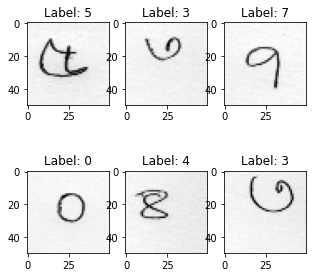

In [3]:
# Visualize some of the images from the training dataset
plt.figure(figsize=(5,5))
for index in range(0,6):
    plt.subplot(2, 3, 1 + index)
    plt.imshow(train_set[index], cmap="gray")
    plt.title(f"Label: {labels[index]}")

In [4]:
#Normalize the images and change the labels to categorical
x_train = train_set/255.0
x_train = x_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
labels = to_categorical(labels)

In [5]:
# Creating the 5-layer Convolutional Neural Network. 
# Loss: Categorical Crossentropy, Optimizer: Adam
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(IMG_SIZE,IMG_SIZE,1)),
        tf.keras.layers.MaxPooling2D(2,2),
        
        tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        
        tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")
    ])
    
    model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [6]:
# Training the model
history = model.fit(x_train, labels, epochs = 10, batch_size=32, validation_split=0.1)

Train on 17280 samples, validate on 1920 samples
Epoch 1/10
17280/17280 [==============================] - 86s 5ms/sample - loss: 0.8565 - accuracy: 0.7015 - val_loss: 0.3073 - val_accuracy: 0.9021
Epoch 2/10
17280/17280 [==============================] - 81s 5ms/sample - loss: 0.1831 - accuracy: 0.9396 - val_loss: 0.1944 - val_accuracy: 0.9359
Epoch 3/10
17280/17280 [==============================] - 80s 5ms/sample - loss: 0.1063 - accuracy: 0.9639 - val_loss: 0.1436 - val_accuracy: 0.9589
Epoch 4/10
17280/17280 [==============================] - 80s 5ms/sample - loss: 0.0665 - accuracy: 0.9782 - val_loss: 0.1591 - val_accuracy: 0.9604
Epoch 5/10
17280/17280 [==============================] - 79s 5ms/sample - loss: 0.0530 - accuracy: 0.9824 - val_loss: 0.2363 - val_accuracy: 0.9318
Epoch 6/10
17280/17280 [==============================] - 78s 5ms/sample - loss: 0.0406 - accuracy: 0.9875 - val_loss: 0.1909 - val_accuracy: 0.9531
Epoch 7/10
17280/17280 [==============================] -

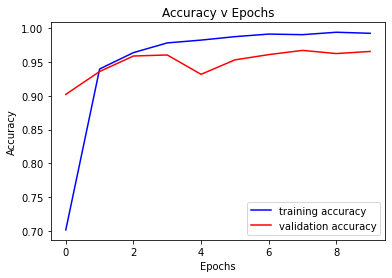

In [7]:
# Plotting the accuracy curves
history_dict = history.history
train_accuracy = history_dict["accuracy"]
val_accuracy = history_dict["val_accuracy"]
epochs = range(0,10)
plt.plot(epochs, train_accuracy, c = "b", label="training accuracy")
plt.plot(epochs, val_accuracy, c="r", label="validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy v Epochs")
plt.legend()
plt.show()

### Model evaluation

In [8]:
# Test set is taken from the "training-d" directory. 
# Test set is prepared just like the train set. 
test_label_dir = "desktop/test_set/test_set_labels.csv"
df = pd.read_csv(test_label_dir)
#print(df.head())
filenames = df.iloc[:,-1]
y = df.iloc[:,2]
test_labels_dict = {}

for i in range(len(y)):
    test_labels_dict[filenames[i]] = y[i]

IMG_SIZE = 50
test_set = []
test_labels = []
basedir = "desktop/test_set/test_set_img"

for fname in os.listdir(basedir):
    if fname in test_labels_dict:
        test_labels.append(test_labels_dict[fname])
        img_array = cv2.imread(os.path.join(basedir,fname), cv2.IMREAD_GRAYSCALE)
        img_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
        test_set.append(img_array)
        #plt.imshow(img_array, cmap="gray")
        #plt.show()
    else:
        pass
test_set = np.asarray(test_set)
test_labels = np.asarray(test_labels)
print(test_set.shape)
print(test_labels.shape)

test_set = test_set / 255.0
test_set = test_set.reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_labels = to_categorical(test_labels)
loss, accuracy = model.evaluate(test_set, test_labels, verbose=0)
print(f"Model Accuracy: {accuracy*100}%") # 96.03% accuracy on test set

(10762, 50, 50)
(10762,)
Model Accuracy: 96.03233337402344%


### Predictions

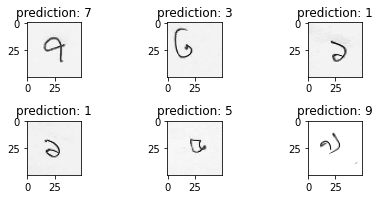

In [17]:
def predict(img_path):
    images = []
    predictions = []
    for fname in os.listdir(img_path):
        img_array = cv2.imread(os.path.join(img_path, fname), cv2.IMREAD_GRAYSCALE)
        img_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
        images.append(img_array)
        img_array = img_array / 255.0
        img_array = img_array.reshape(-1, IMG_SIZE,IMG_SIZE,1)
        pred = model.predict(img_array)
        predictions.append(np.argmax(pred))
    for index in range(len(os.listdir(img_path))):
        plt.subplot(3,3,1+index)
        plt.imshow(images[index], cmap="gray")
        plt.title(f"prediction: {predictions[index]}")
        plt.tight_layout()
path = "desktop/test_set/predict"
predict(path) # As we can see, the model correctly predicted all the given images